# An Analysis of Professional Athlete Performance Following an Event that Garnered Negative Media Attention

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Names

- Gabriel Colon
- Sia Khorsand
- Paul Kim
- Ava Rubin
- Ivan Smith

# Abstract

The sports industry is one of the most significant forms of entertainment in the world, generating over $300 billion per year. The sheer size of this industry and the amount of attention it receives on a daily basis makes athletes some of the most famous people in the country. This begs the question of whether the negative consequences of fame have a noticeable effect on players’ morale and performance. This project embarks on a journey to explore and analyze the impact of scandals, followed by negative media attention on the performance of professional athletes across football, basketball, and baseball leagues. For the purposes of this project, we define a scandal as a public controversial event, such as legal issues and news from the athletes’ personal life. By meticulously compiling and analyzing datasets consisting of player performance metrics, and extracting sentiment data from social media, this study uncovers the complexities in the relationship between off-field controversies and on-field performance. Through the application of data and sentiment analysis, and visualization techniques, this project presents an examination of athlete performance metrics in relation to the timing and intensity of off-field incidents reported by news and social media. 
   
Our methods include sentiment analysis of media coverage, statistical analysis of performance data through models and visualizations, while considering ethical standards. Initial findings suggest a subtle impact, with a majority of athletes showing a decline in performance in the first few games post-scandal, while a few others demonstrate a different reaction by improving. This highlights the variable nature of reactions to negative attention from the media, but indicates the clear impact that it has on the morale of athletes, whether positive or negative. 
    
This project is important in terms of its contributions to sports sociology discourse, highlighting the impact of public scrutiny on players’ morale, laying the groundwork for future research regarding the long term effects on athletes’ careers and mental overall well-being. 


# Research Question

How do scandals involving professional athletes, defined as public controversies or legal issues, and subsequent negative media attention impact their on-field performance in specific sports (e.g., football, basketball, baseball) within a defined time frame (e.g., the first five games following the incident)?

## Background and Prior Work


Professional athletes receive a lot of attention both for their personal and professional lives. As a result of this, any crime, or questionable choice they make, is highly publicized, and garners a lot of attention from the media. Because of this, we are interested in seeing if/how negative media attention surrounding a player affects their performance on the field following the 'scandal'. 

An article published in The Eagle provides insights into the societal repercussions of scandals involving professional athletes, emphasizing shifts in public perception and media coverage<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). While there are detailed discussions on how scandals affect athletes' reputations and the public's view of sports figures, there is a noticeable absence of direct references to empirical studies examining the correlation between scandals and athletes' on-field performance. Instead, the focus lies on the broader implications of scandals within the context of professional sports culture, including the erosion of trust in athletes and the idealized image of sportsmanship. The texts suggest that while scandals may tarnish individual reputations and lead to temporary condemnation, they do not directly address empirical evidence linking scandals to changes in athletes' on-field performance.

Additionally, one study found that athletes facing scandal-related stress may experience heightened levels of psychological strain, impacting their focus and confidence on the field<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Coping strategies discussed, such as seeking social support and employing problem-focused techniques, may be crucial for athletes navigating the fallout from scandals to maintain their mental well-being and sustain optimal performance. Ultimately, the interplay between scandal-induced stress, coping mechanisms, and mental health can significantly influence athletes' ability to perform at their best under pressure.

A dissertation from Florida State University explores the impact of sports scandals, categorizing them into on-field (performance-related) and off-field (non-performance-related) events<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). Through experimental investigation, it finds that both types of scandals have significant effects on sport consumers' team identification and behavioral intentions, with on-field scandals generally eliciting stronger negative reactions. Additionally, the study highlights the moderating role of team identification, indicating that individuals' level of identification with a team influences their responses to sports scandals.

Building upon these prior studies, further research could delve deeper into the mechanisms through which scandals influence athletes' on-field performance across different sports. By considering factors such as media scrutiny, public perception, and internal team dynamics, researchers can provide valuable insights into how athletes navigate and mitigate the effects of off-field controversies on their professional endeavors.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Fein, M. et al. (31 Aug 2013) Quick Take: How have recent scandals changed public perceptions of professional sports and athletes? *The Eagle*. https://www.theeagleonline.com/article/2013/08/quick-take-how-have-recent-scandals-changed-public-perceptions-of-professional-sports-and-athletes
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Nuetzel, B. (16 Nov 2023). Coping strategies for handling stress and providing mental health in Elite Athletes: A Systematic Review. *Frontiers in Sports and Active Living, 5*. https://doi.org/10.3389/fspor.2023.1265783 
2. <a name="cite_note-3"></a> [^](#cite_ref-3) Hamilton, J. M. (2016). The Impact of On-and Off-Field Sports Scandals on Team Identification and Consumer Behavior Intentions *The Florida State University ProQuest Dissertations Publishing*. http://purl.flvc.org/fsu/fd/FSU_2016SP_Hamilton_fsu_0071E_13026


# Hypothesis


Athletes implicated in scandals will exhibit a statistically significant decrease in their on-field performance, measured by key performance indicators (e.g., points scored, assists, rebounds in basketball; goals, assists, saves in soccer; runs, hits, strikeouts in baseball), in the first five games following the scandal compared to their average performance in the five games prior to the scandal.

# Data

## Data overview

Since we are using multiple datasets, we will need to effectively combine them. Our two main sources of data will be player performance, and then relevant news about the major sports leagues. We will cross reference the dates of when the relevant news happened, and then analyze the corresponding players performance following this.

### Tweets about NFL, NBA, MLB in the Last 10 Years
This is a custom dataset. We created a python script that uses Selenium and BeautifulSoup to scrape Twitter (X) accounts for tweets that mention the NFL, NBA, or MLB. The accounts we are scraping are majors news publications that tend to report on what we are looking for. This script will create a CSV file with the date, content, and which news outlet the relevant tweet came from.
To further process this dataset, we performed sentiment analysis using the VADER lexicon (as detailed below), to only keep tweets with a negative sentiment, as that is that we are interested in. We also filtered the tweets for each respective league to only be in the relevant timeframe of their season. We are not interested in the off seasons. The CSV returned by this script can be found in our repo, and is titled 'tweets.csv'

In [ ]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import csv

options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)
core_url = 'https://twitter.com/search?q=(nfl%20OR%20mlb%20OR%20nba)%20(from%3AMailOnline%20OR%20from%3ATMZ%20OR%20from%3AYahooNews%20OR%20from%3ANYTimes%20OR%20from%3ACNN%20OR%20from%3AFoxNews%20OR%20from%3ANYPost%20OR%20from%3Aguardian%20OR%20from%3ARollingStone%20OR%20from%3ACBS%20OR%20from%3Awashingtonpost)%20until%3A_ENDDATE_%20since%3A_STARTDATE_%20-filter%3Areplies&src=typed_query&f=top'
tweets = []

def new_url(start_month, year):
    end_year = year
    if(start_month == 11):
        end_month = 1
        end_year = year + 1
    else:
        end_month = start_month + 2
    
    
    
    year = str(year)
    end_year = str(end_year)
    start_month = str(start_month)
    end_month = str(end_month)

    target_url = core_url.replace('_STARTDATE_',year+'-'+start_month+'-01').replace('_ENDDATE_',end_year+'-'+end_month+'-01')
    return target_url

def scroll_page():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#scrape
def scrape_curr_page(start_month,curr_year):
    target_url = new_url(start_month,curr_year)
    driver.get(target_url)
    for i in range(5):
        time.sleep(7)  
        resp = driver.page_source
        soup = BeautifulSoup(resp, 'html.parser')
        
        for tweet in soup.find_all("div", {"data-testid": "cellInnerDiv"}):
            tweet_text_element = tweet.find("div", {"data-testid": "tweetText"})
            if tweet_text_element:
                tweet_text = tweet_text_element.get_text().strip()
            else:
                tweet_text = ""
            
            tweet_user_element = tweet.find('a', href=True) 
            tweet_date_element = tweet.find('time')
            
            if tweet_user_element and tweet_date_element:
                tweet_user = tweet_user_element.get('href')
                tweet_date = tweet_date_element.get('datetime')
                tweets.append({'date': tweet_date, 'text': tweet_text, 'user': tweet_user})
                
        scroll_page()
    
#add to CSV
def write_to_csv():
    csv_file_name = 'tweets.csv'
    fieldnames = ['date', 'text', 'user']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for tweet in tweets:
            clean_text = tweet['text'].replace('\n', ' ')
            writer.writerow({'date': tweet['date'], 'text': clean_text, 'user': tweet['user']})
    print(f"Data has been written to {csv_file_name}")

start_months = [1,3,5,7,9,11]

for year in range(2013,2023):
    for start_month in start_months:
        scrape_curr_page(start_month, year)
        time.sleep(2)

write_to_csv()

Import the created custom tweets dataset, then cleaning to allow for accurate and easier exploration.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('Tweets/tweets.csv')
df = df.drop_duplicates()
df['date'] = pd.to_datetime(df['date'])
df['user'] = df['user'].str.replace('/','',regex=False)
df

,date,text,user
0,2013-01-29 12:04:52+00:00,"In Letter, NBA Agent Calls for Ouster of Union...",nytimes
1,2013-02-03 00:38:31+00:00,RGIII named NFL Rookie of the Year. http://wap...,washingtonpost
2,2013-02-20 03:15:17+00:00,NBA says Lil Wayne is not banned from league e...,TMZ
3,2013-01-02 18:01:25+00:00,NBA Legend Latrell Sprewell -- ARRESTED for Bl...,TMZ
4,2013-02-04 21:46:04+00:00,"NFL finds ""no indication"" that Beyonce caused ...",RollingStone
...,...,...,...
1629,2023-10-30 14:51:45+00:00,Kim Kardashian's SKIMS Becomes NBA's Official ...,TMZ
1630,2023-10-13 01:13:45+00:00,Taylor Swift Wearing $112 Jacket From Erin And...,TMZ
1631,2023-09-24 23:45:06+00:00,The Miami Dolphins put on an offensive masterc...,CNN
1646,2023-12-09 20:36:33+00:00,Breaking News from @TheAthletic: The MLB star ...,nytimes


This is what the full tweets dataset we are working with looks like. The 'date' column is how we are defining a subsequent 'scandal date'. This is because the date of the tweet marks the start of the scandal and negative media attention, and we are interested in how player performance is affected after *negative media attention*, not just after the 'scandal' happens.

#### Wrangling Tweets
After scraping X (Twitter) for tweets about athletes over the last decade to create the tweets.csv dataset, we now need to clean and analyze what we collected. To do so, we used the VADER lexicon to perform a sentiment analysis on the remaining tweets, as we are focusing only on negative media attention. Then we split and narrowed down the dataframes to only contain tweets from the relevant time period and only about relevant players.

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [ ]:
nltk.download('vader_lexicon') 

Perform sentiment analysis on the tweets using the VADER lexicon in order to determine if the tweets are negative, as desired

In [17]:
analyser = SentimentIntensityAnalyzer()
df['compound'] = df['text'].apply(lambda x: analyser.polarity_scores(x)['compound'])
df_copy = df.copy()
df = df[df['compound'] <= -0.05]
df.reset_index(drop=True, inplace=True)
df.head()

,date,text,user,compound
0,2013-01-02 18:01:25+00:00,NBA Legend Latrell Sprewell -- ARRESTED for Bl...,TMZ,-0.8374
1,2013-02-04 21:46:04+00:00,"NFL finds ""no indication"" that Beyonce caused ...",RollingStone,-0.2960
2,2013-04-22 15:47:24+00:00,Which struggling slugger will rebound in Week ...,nytimes,-0.4215
3,2013-04-29 16:05:44+00:00,Which lefty will strike out the most batters i...,nytimes,-0.1280
4,2013-08-29 04:20:00+00:00,Read our full in-depth story about NFL player ...,RollingStone,-0.7845


Create subframe of tweets for NBA and filter to only contain tweets from the season

In [18]:
NBA_df = df[df['text'].str.contains('NBA', case=False)]
NBA_df = NBA_df[NBA_df['date'].dt.month.isin([10,11,12,1,2,3,4])]
NBA_df.head()

,date,text,user,compound
0,2013-01-02 18:01:25+00:00,NBA Legend Latrell Sprewell -- ARRESTED for Bl...,TMZ,-0.8374
15,2013-10-10 23:42:20+00:00,NBA Star Kendrick Perkins -- ARRESTED ... Alle...,TMZ,-0.5904
22,2013-11-21 04:30:39+00:00,Did you see the STRUGGLE SUIT former NBA’er Tr...,TMZ,-0.5147
23,2013-12-18 01:24:11+00:00,Watch Paul McCartney hit all five stages of gr...,RollingStone,-0.4939
26,2013-11-06 18:26:24+00:00,Dwight Howard -- Fan Detained After Striking N...,TMZ,-0.1027


Create subframe of tweets for MLB and filter to only contain tweets from the season. Since this ending up being a small dataframe, we can immediately export it to a CSV so we can see what the relevant tweets were. This CSV can be found in the 'Data' directory.

In [19]:
MLB_df = df[df['text'].str.contains('MLB', case=False)]
MLB_df = MLB_df[MLB_df['date'].dt.month.isin([3,4,5,6,7,8,9,10])]
#CSV has already been generated, so we do not need to run this line again
#MLB_df.to_csv('MLB_tweets.csv', sep=',', index=False, encoding='utf-8')
MLB_df.head()

,date,text,user,compound
2,2013-04-22 15:47:24+00:00,Which struggling slugger will rebound in Week ...,nytimes,-0.4215
3,2013-04-29 16:05:44+00:00,Which lefty will strike out the most batters i...,nytimes,-0.1280
6,2013-07-08 19:09:58+00:00,50 Cent DROPPED from MLB All-Star Bash After D...,TMZ,-0.6249
10,2013-08-23 03:29:36+00:00,MLB's Ryan Braun apologizes: 'I have no one to...,CNN,-0.1406
13,2013-08-01 09:51:28+00:00,"Alex Rodriguez, #MLB reportedly negotiating de...",FoxNews,-0.7003


Create subframe of tweets for NFL and filter to only contain tweets from the season

In [20]:
NFL_df = df[df['text'].str.contains('NFL', case=False)]
NFL_df = NFL_df[NFL_df['date'].dt.month.isin([8,9,10,11,12,1,2])]
NFL_df.head()

,date,text,user,compound
1,2013-02-04 21:46:04+00:00,"NFL finds ""no indication"" that Beyonce caused ...",RollingStone,-0.2960
4,2013-08-29 04:20:00+00:00,Read our full in-depth story about NFL player ...,RollingStone,-0.7845
5,2013-08-31 16:45:07+00:00,Patriots drop Tim Tebow after just 12 weeks; N...,nypost,-0.2732
7,2013-08-31 15:23:07+00:00,"Aaron Hernandez was a promising NFL player, bu...",RollingStone,-0.7634
8,2013-08-28 18:06:04+00:00,Aaron Hernandez might have been one of the NFL...,RollingStone,-0.8140


Import the custom dataset we created of all active NFL players in history, then filter it to only include active players in the last 10 years

In [21]:
NFL_players_df = pd.read_csv('Data/all_NFL_players.csv')
NFL_players_df = NFL_players_df[NFL_players_df['Start Year'] >= 2013]
list_of_NFL = NFL_players_df['Name'].tolist()

Cross reference this player database with the tweets, and only keep tweets that mention active players. Then, export the remaining tweets to a CSV for further use.

In [22]:
NFL_df['contains_player'] = NFL_df['text'].apply(lambda x: any(name in x for name in list_of_NFL))
NFL_df = NFL_df[NFL_df['contains_player']]
#NFL_df.to_csv('NFL_tweets.csv', sep=',', index=False, encoding='utf-8')
NFL_df.head()

,date,text,user,compound,contains_player
58,2015-12-22 00:37:07+00:00,Odell Beckham Jr. is suspended for one game by...,nytimes,-0.4767,True
92,2016-11-14 12:53:01+00:00,NFL star Mike Evans sits during national anthe...,CNN,-0.2500,True
132,2019-11-30 02:03:07+00:00,"Josh Shaw, a defensive back for the Arizona Ca...",CNN,-0.4588,True
147,2020-02-27 20:34:02+00:00,"NFL's Mark Walton Arrested Again, Fifth Time I...",TMZ,-0.4767,True
154,2020-02-27 22:54:32+00:00,NFL Prospect Mitchell Wilcox Violently Drilled...,TMZ,-0.3818,True


Repeat the same steps for the NBA

In [23]:
NBA_players_df = pd.read_csv('Data/all_NBA_players.csv')
NBA_players_df = NBA_players_df[NBA_players_df['From Year'] >= 2013]
list_of_NBA = NBA_players_df['Player Name'].tolist()

In [24]:
NBA_df['contains_player'] = NBA_df['text'].apply(lambda x: any(name in x for name in list_of_NBA))
NBA_df = NBA_df[NBA_df['contains_player']]
#NBA_df.to_csv('NBA_tweets.csv', sep=',', index=False, encoding='utf-8')
NBA_df.head()

,date,text,user,compound,contains_player
155,2020-02-26 19:58:32+00:00,NBA's Malik Monk Suspended for Violating Leagu...,TMZ,-0.7650,True
224,2020-10-01 04:17:42+00:00,LA Lakers crush Miami Heat in NBA finals opene...,guardian,-0.1531,True
232,2020-10-27 15:19:02+00:00,NBA's Tyler Herro Visits 'Turks & Cake' W/ Kat...,TMZ,-0.3182,True
326,2023-04-20 23:00:07+00:00,"Joel Embiid, the 7-foot, 280-pound center of t...",nytimes,-0.1692,True
329,2023-10-25 19:20:06+00:00,"From @TheAthletic: Victor Wembanyama, the NBA'...",nytimes,-0.3566,True


After running all of these cells, we were left with 3 CSV files--one for each league. These files contain about 5-15 tweets each, of what are thought to be the most relevant tweets for our research. After opening up and taking a further look at the output, we were left with only 7 relevant tweets about players. Since there were only 7 players to analyze stats for, we did this by hand, and created 3 more datasets. These datasets are further described in the following section, under the title 'Relevant Player Statistics'. 

## All Players Across History
In order to figure out which tweets were about active players when they were written, we needed a dataset of all active players for each league across time, with the players name and years they were active. To do this, we scraped the website https://www.basketball-reference.com for the NBA, and https://www.pro-football-reference.com for the NFL. Since there were only ~15 tweets in the MLB dataframe after cleaning, we could look through it by hand and determine which players were active and relevant.

Below is the script to scrape for NFL players. The script for NBA players is similar, and both can be located in the Scripts directory. The following script is titled NFLPlayers.py, and the other is NBAPlayers.py. The output of these scripts are all_NFL_players.csv and all_NBA_players.csv, respectively.

In [ ]:
#WILL NOT RUN IN JUPYTER NOTEBOOK
from bs4 import BeautifulSoup
import requests
import re

import csv
import string


core_url = 'https://www.pro-football-reference.com/players/LETTER/'
players = []

def new_url(letter):
    target_url = core_url.replace('LETTER',letter)
    return target_url

#scrape
def scrape_curr_page(letter):
    target_url = new_url(letter)
    response = requests.get(target_url)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    players_div = soup.find('div', id='div_players')

    for p_tag in players_div.find_all('p'):
        name = p_tag.find('a').text
        p_text = p_tag.text
        position_years = re.search(r'\((.*?)\)\s*(\d{4}-\d{4})', p_text)
    
        if position_years:
            position = position_years.group(1)
            years = position_years.group(2).split('-')
        else:
            position = ''
            years = ['', '']

        players.append({
            'Name': name,
            'Position': position,
            'Start Year': years[0],
            'End Year': years[1]
        })
    
#add to CSV
def write_to_csv():
    csv_file_name = 'all_NFL_players.csv'
    fieldnames = ['Name', 'Position', 'Start Year', 'End Year']
    with open(csv_file_name, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        for player in players:
            writer.writerow(player)
    print(f"Data has been written to {csv_file_name}")


for letter in list(string.ascii_uppercase):
    scrape_curr_page(letter)

write_to_csv()

#### The Created NFL Player Dataset

In [25]:
NFL_players_df.head()

,Name,Position,Start Year,End Year
0,Isaako Aaitui,NT,2013,2013
1,Israel Abanikanda,RB,2023,2023
5,Jared Abbrederis,WR,2015,2017
7,Mehdi Abdesmad,DE,2016,2016
10,Ameer Abdullah,RB,2015,2023


#### The Created NBA Player Dataset

In [26]:
NBA_players_df.head()

,Player Name,From Year
9,Álex Abrines,2017
10,Precious Achiuwa,2021
15,Quincy Acy,2013
20,Jaylen Adams,2019
21,Jordan Adams,2015


## Relevant Player Statistics
Once we had narrowed down which players had negative media attention, we could move on to collecting data about each of these players. Since there was <10 players remaining, we could collect this data by hand. For the NFL, we used fantasy data from the site https://fantasydata.com/nfl. For the MLB and NBA players, we used actual game statistics, from https://www.espn.com. For the NBA, we simply used points scored per game. For the MLB, we used the OPS metric, which stands for On-base Plus Slugging. This is a metric meant to combine how well a hitter can reach base, with how well he can hit for average and for power (from https://www.mlb.com/glossary/standard-stats/on-base-plus-slugging). We also included a column for each player with their average of their respective metric, for use in EDA and drawing conclusions.

In [27]:
mlb_stats = pd.read_csv('Data/MLBStats.csv')
mlb_stats['Date'] = pd.to_datetime(mlb_stats['Date'])
mlb_stats.head()

,Player,Position,Date,OPS,Average OPS
0,Ryan Braun,RF,2013-07-21,0.869,0.869
1,Ryan Braun,RF,2013-07-20,0.873,0.869
2,Ryan Braun,RF,2013-07-19,0.875,0.869
3,Ryan Braun,RF,2013-07-09,0.887,0.869
4,Ryan Braun,RF,2013-06-09,0.890,0.869


In [28]:
nba_stats = pd.read_csv('Data/NBAStats.csv')
nba_stats.head()

,Player,Position,Date,Points,Average Points (Season)
0,Malik Monk,SG,2020-02-25,8.0,11.7
1,Malik Monk,SG,2020-02-22,15.0,11.7
2,Malik Monk,SG,2020-02-20,25.0,11.7
3,Malik Monk,SG,2020-02-12,25.0,11.7
4,Malik Monk,SG,2020-02-10,17.0,11.7


In [29]:
nfl_stats = pd.read_csv('Data/NFLStats.csv')
nfl_stats['Date'] = pd.to_datetime(nfl_stats['Date'])
nfl_stats.head()

,Player,Position,Date,Fantasy Points,Average Points (Season)
0,Odell Beckham Jr.,WR,2015-09-13,4.4,15.6
1,Odell Beckham Jr.,WR,2015-09-20,20.6,15.6
2,Odell Beckham Jr.,WR,2015-09-24,13.9,15.6
3,Odell Beckham Jr.,WR,2015-10-04,3.8,15.6
4,Odell Beckham Jr.,WR,2015-10-11,18.4,15.6


# Results

## Exploratory Data Analysis

## Distributions of Relevant Variables
Before anything, we want to get a better understanding of what is contained in our data. To do so, we will look into the distribution of player points, as well as the sentiment of the collected tweets.

#### Sentiment Distribution

In [30]:
import matplotlib.pyplot as plt

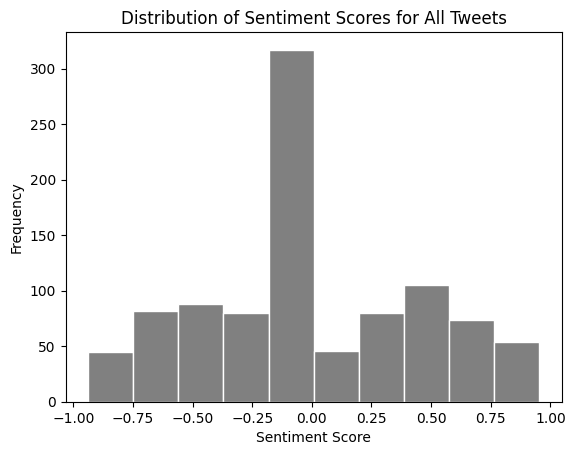

In [31]:
plt.hist(df_copy['compound'], color="gray",bins=10,edgecolor='white')
plt.title('Distribution of Sentiment Scores for All Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

After plotting the distribution of the sentiment scores of all the tweets pre-wrangling, we can see that the majority of the tweets have a neutral sentiment. We can also see that there is roughly an equal amount of negative/positive sentiment tweets. The positive sentiment tweets follow a normal distribution, with a mean of about 0.50. The negative tweets follow a more uniform distribution, however the mode of the distribution is also -0.50. 

#### Player Points Distribution

In [32]:
OBJ_data = nfl_stats[nfl_stats['Player'] == 'Odell Beckham Jr.']
ME_data = nfl_stats[nfl_stats['Player'] == 'Mike Evans']
DW_data = nfl_stats[nfl_stats['Player'] == 'Deshaun Watson']

In [33]:
print('OBJ Descriptive Statistics')
print('Mean:', OBJ_data['Fantasy Points'].mean(), 'Median:', OBJ_data['Fantasy Points'].median(), 'Mode: ', OBJ_data['Fantasy Points'].mode()[0], '\n')
print('Mike Evans Descriptive Statistics')
print('Mean:', ME_data['Fantasy Points'].mean(), 'Median:', ME_data['Fantasy Points'].median(), 'Mode: ', ME_data['Fantasy Points'].mode()[0], '\n')
print('Deshaun Watson Descriptive Statistics')
print('Mean:', DW_data['Fantasy Points'].mean(), 'Median:', DW_data['Fantasy Points'].median(), 'Mode: ', DW_data['Fantasy Points'].mode()[0])

OBJ Descriptive Statistics
Mean: 13.34736842105263 Median: 12.1 Mode:  12.1 

Mike Evans Descriptive Statistics
Mean: 13.006250000000001 Median: 12.75 Mode:  5.9 

Deshaun Watson Descriptive Statistics
Mean: 17.96 Median: 17.6 Mode:  5.34


In [34]:
OBJ_scandal = pd.to_datetime('2015-12-22')
ME_scandal = pd.to_datetime('2016-11-14')
DW_scandal = pd.to_datetime('2022-08-01')


In [35]:
OBJ_mean_before = OBJ_data[OBJ_data['Date'] < OBJ_scandal]['Fantasy Points'].mean()
OBJ_mean_after = OBJ_data[OBJ_data['Date'] >= OBJ_scandal]['Fantasy Points'].mean()
print('OBJ Mean Before:', OBJ_mean_before, 'OBJ Mean After:', OBJ_mean_after)

ME_mean_before = ME_data[ME_data['Date'] < ME_scandal]['Fantasy Points'].mean()
ME_mean_after = ME_data[ME_data['Date'] >= ME_scandal]['Fantasy Points'].mean()
print('Mike Evans Mean Before:', ME_mean_before, 'Mike Evans Mean After:', ME_mean_after)

DW_mean_before = DW_data[DW_data['Date'] < DW_scandal]['Fantasy Points'].mean()
DW_mean_after = DW_data[DW_data['Date'] >= DW_scandal]['Fantasy Points'].mean()
print('Deshaun Watson Mean Before:', DW_mean_before, 'DW Mean After:', DW_mean_after)


OBJ Mean Before: 15.564285714285713 OBJ Mean After: 7.139999999999999
Mike Evans Mean Before: 14.566666666666666 Mike Evans Mean After: 11.0
Deshaun Watson Mean Before: 22.396 DW Mean After: 14.263333333333335


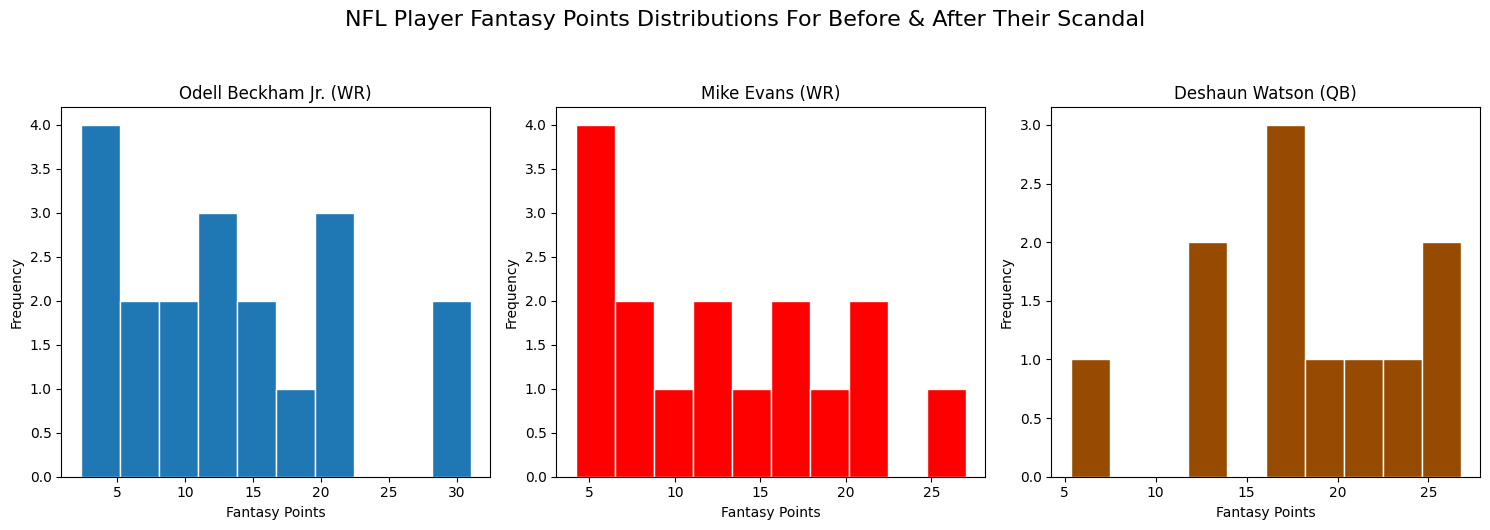

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].hist(OBJ_data['Fantasy Points'], bins=10,edgecolor='white')
axs[0].set_title('Odell Beckham Jr. (WR)')
axs[0].set_xlabel('Fantasy Points')
axs[0].set_ylabel('Frequency')

axs[1].hist(ME_data['Fantasy Points'], color='red',bins=10,edgecolor='white')
axs[1].set_title('Mike Evans (WR)')
axs[1].set_xlabel('Fantasy Points')
axs[1].set_ylabel('Frequency')

axs[2].hist(DW_data['Fantasy Points'], color='#964b00',bins=10,edgecolor='white')
axs[2].set_title('Deshaun Watson (QB)')
axs[2].set_xlabel('Fantasy Points')
axs[2].set_ylabel('Frequency')

plt.suptitle('NFL Player Fantasy Points Distributions For Before & After Their Scandal', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

The fantasy points distribution of Odell Beckham Jr. and Mike Evans appear relatively similar. It is important to note that they are both wide receivers, which could explain why their distributions look disimilar to that of Deshuan Watson, who is a quarterback. Both of the wide receivers have a positively skewed distribution. We can visually see this, but looking at both players mean, median, and mode, points, we can see that both have mean > median > mode, which is the characteristic of a positive distribution. Deshaun Watson's point distribution is closest to a normal distribution. When looking at the descriptive statistics, the mean and median are the same number. With the mode, we can see from the histogram that the most frequent bin also falls around the same, so we can say that mean = median = mode, which is the characteristic trait of a normal distribution.

In [37]:
AR_data = mlb_stats[mlb_stats['Player'] == 'Alex Rodriguez']
RB_data = mlb_stats[mlb_stats['Player'] == 'Ryan Braun']
FT_data = mlb_stats[mlb_stats['Player'] == 'Fernando Tatis Jr.']

In [38]:
print('Alex Rodriguez Descriptive Statistics')
print('Mean:', AR_data['OPS'].mean(), 'Median:', AR_data['OPS'].median(), 'Mode: ', AR_data['OPS'].mode()[0], '\n')
print('Ryan Braun Descriptive Statistics')
print('Mean:', RB_data['OPS'].mean(), 'Median:', RB_data['OPS'].median(), 'Mode: ', RB_data['OPS'].mode()[0], '\n')
print('Fernando Tatis Jr. Descriptive Statistics')
print('Mean:', FT_data['OPS'].mean(), 'Median:', FT_data['OPS'].median(), 'Mode: ', FT_data['OPS'].mode()[0], '\n')


Alex Rodriguez Descriptive Statistics
Mean: 0.6705 Median: 0.768 Mode:  0.5 

Ryan Braun Descriptive Statistics
Mean: 0.7101875 Median: 0.874 Mode:  0.869 

Fernando Tatis Jr. Descriptive Statistics
Mean: 0.76325 Median: 0.8935 Mode:  0.981 



In [39]:
AR_scandal = pd.to_datetime('2013-08-01')
RB_scandal = pd.to_datetime('2013-08-23')
FT_scandal = pd.to_datetime('2022-08-12')

In [40]:
AR_mean_before = AR_data[AR_data['Date'] < AR_scandal]['OPS'].mean()
AR_mean_after = AR_data[AR_data['Date'] >= AR_scandal]['OPS'].mean()
print('Alex Rodriguez Mean Before:', AR_mean_before, 'Alex Rodriguez Mean After:', AR_mean_after)

RB_mean_before = RB_data[RB_data['Date'] < RB_scandal]['OPS'].mean()
RB_mean_after = RB_data[RB_data['Date'] >= RB_scandal]['OPS'].mean()
print('Ryan Braun Mean Before:', RB_mean_before, 'Ryan Braun Mean After:', RB_mean_after)

FT_mean_before = FT_data[FT_data['Date'] < FT_scandal]['OPS'].mean()
FT_mean_after = FT_data[FT_data['Date'] >= FT_scandal]['OPS'].mean()
print('Fernando Tatis Jr. Mean Before:', FT_mean_before, 'Fernando Tatis Jr. Mean After:', FT_mean_after)

Alex Rodriguez Mean Before: 0.6215999999999999 Alex Rodriguez Mean After: 0.7194
Ryan Braun Mean Before: 0.8823000000000001 Ryan Braun Mean After: 0.42333333333333334
Fernando Tatis Jr. Mean Before: 0.9836 Fernando Tatis Jr. Mean After: 0.5429000000000002


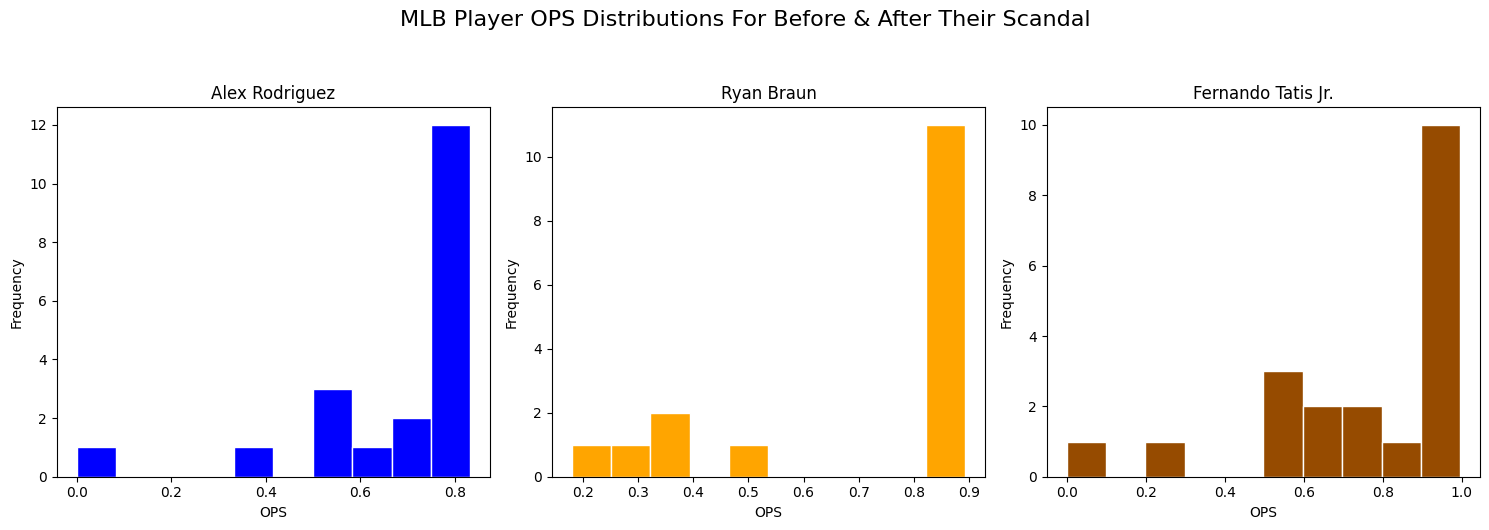

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].hist(AR_data['OPS'], color="blue",bins=10,edgecolor='white')
axs[0].set_title('Alex Rodriguez')
axs[0].set_xlabel('OPS')
axs[0].set_ylabel('Frequency')

axs[1].hist(RB_data['OPS'], color="orange",bins=10,edgecolor='white')
axs[1].set_title('Ryan Braun')
axs[1].set_xlabel('OPS')
axs[1].set_ylabel('Frequency')

axs[2].hist(FT_data['OPS'], color="#964b00",bins=10,edgecolor='white')
axs[2].set_title('Fernando Tatis Jr.')
axs[2].set_xlabel('OPS')
axs[2].set_ylabel('Frequency')

plt.suptitle('MLB Player OPS Distributions For Before & After Their Scandal', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

When looking at the OPS distribution of all three MLB players, we see they look pretty similar. Alex Rodriguez and Fernando Tatis Jr. both have an "outlier" at the 0.0 bin. However, these datapoints are important for our analysis, and will not be ignored. They could potentially mean the player had a significant dip in performance. We can say all three players have a negative distribution. Looking at their descriptive statistics, we can see the mean is less than the median for all. As OPS is accurate to the thousandths place, we will look at the most frequent bin on all of the graphs to determine mode, rather than single value. We can see for all 3, the mode is greater than the median and mean. Or, the mean/median value is grouped into the mode bin.  

In [42]:
print('Malik Monk Descriptive Statistics')
print('Mean:', nba_stats['Points'].mean(), 'Median:', nba_stats['Points'].median(), 'Mode: ', nba_stats['Points'].mode()[0], '\n')

Malik Monk Descriptive Statistics
Mean: 11.633333333333333 Median: 11.0 Mode:  11.0 



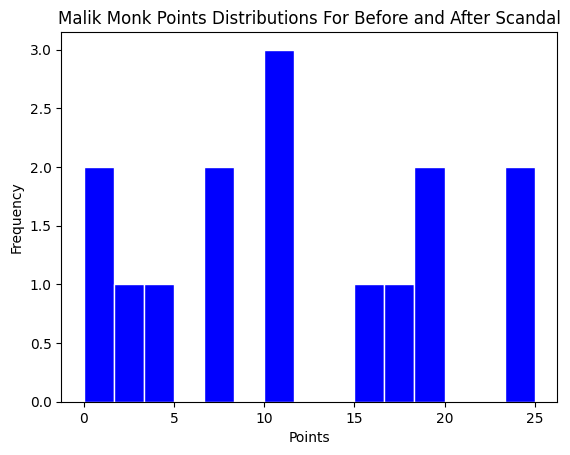

In [43]:
plt.hist(nba_stats['Points'], color="blue",bins=15,edgecolor='white')
plt.title('Malik Monk Points Distributions For Before and After Scandal')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

When looking at Malik Monk's points distribution, we see it is closest to a normal distribution. Additionally, when looking at his descriptive statistics, we see the mean = median = mode, which is a key characteristic of a normal distribution. 

## Player Performance Before and After Their Scandal

In [44]:
import matplotlib.dates as mdates

Text(0.5, 1.0, 'NBA Player Malik Monk Points Before & After Scandal')

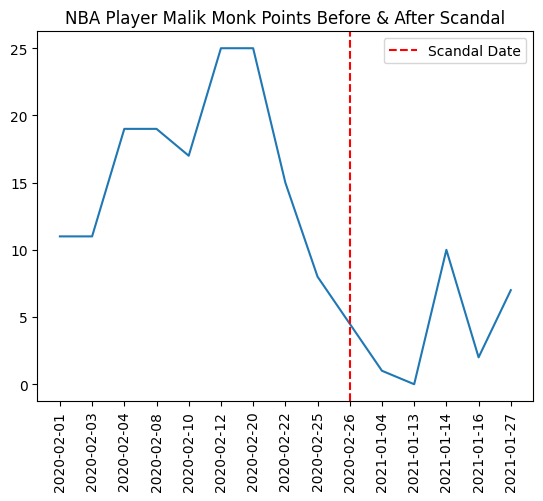

In [45]:
nba_stats = nba_stats.sort_values(by='Date')
plt.plot(nba_stats['Date'], nba_stats['Points'])
plt.xticks(rotation='vertical')
plt.axvline(x='2020-02-26', color='r', linestyle='--', label='Scandal Date')
plt.legend()
plt.title('NBA Player Malik Monk Points Before & After Scandal')

After plotting his points before and after his 'scandal date' (indicated by the dotted red line), we can clearly see in the 5 games following the scandal, his points per game was much lower. However, if we look closer, we see that there was about a year gap in between the game before and after the scandal. Thus, it is difficult to conclude whether or not the scandal itself caused the decline in performance, or if it was a result of not playing a game for a whole year. 

In [46]:
nfl_stats = nfl_stats.sort_values(by='Date')

In [47]:
def plot_player_fantasy_points(player_name, nfl_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = nfl_stats[nfl_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['Fantasy Points'].values, marker='o', linestyle='-', color='b', label='Fantasy Points')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['Fantasy Points']),
                     (row['Date'], row['Fantasy Points']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} Fantasy Points Over Time')
    plt.xlabel('Date')
    plt.ylabel('Fantasy Points')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
    if(player_name == 'Odell Beckham Jr.'):
        plt.axhline(y=OBJ_mean_before, color='gray', linestyle='--', label="Avg. FP Before")
    elif(player_name == 'Mike Evans'): 
        plt.axhline(y=ME_mean_before, color='gray', linestyle='--', label="Avg. FP Before")
    elif(player_name == 'Deshaun Watson'):
        plt.axhline(y=DW_mean_before, color='gray', linestyle='--', label="Avg. FP Before") 
    plt.legend()
    plt.grid(True)
    plt.show()

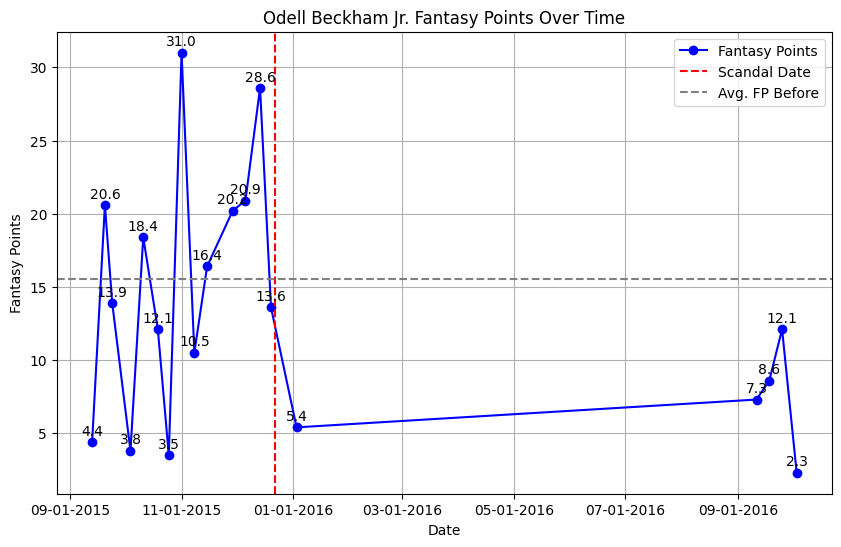

In [48]:
scandal_dates = ['2015-12-22']
plot_player_fantasy_points('Odell Beckham Jr.', nfl_stats, scandal_dates=scandal_dates)


Following his scandal, Odell Beckham Jr. only played 1 more game during the same season. We can see that compared to his previous 7 games, his fantasy points earned during this one game were atleast 50% lower. In his following 4 games at the start of the next season his performance was also relatively lower. 

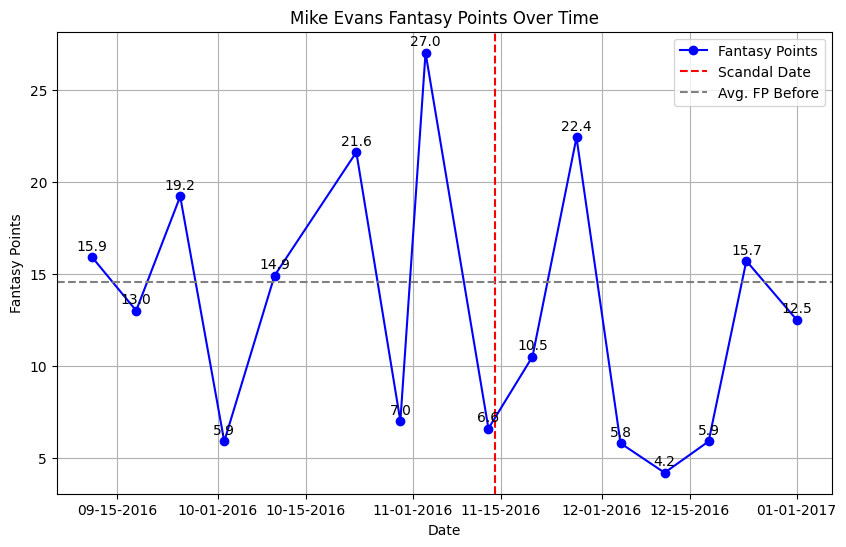

In [49]:
scandal_dates = ['11/14/16']
plot_player_fantasy_points('Mike Evans', nfl_stats, scandal_dates=scandal_dates)

Following his scandal, Mike Evans fantasy points were on average lower than before. The horizontal gray line indicates his average fantasy points before the scandal, and we can see that after the scandal, most of his games he scored below that average.

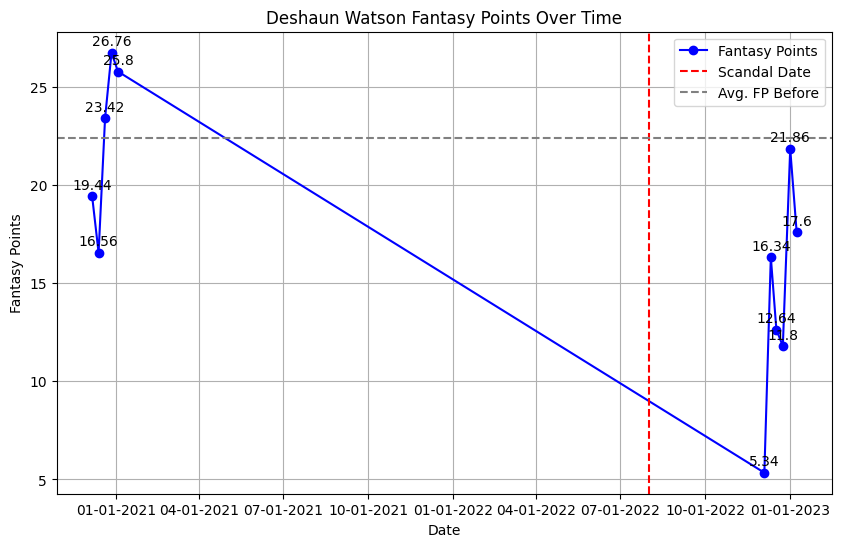

In [50]:
scandal_dates = ['8/1/22']
plot_player_fantasy_points('Deshaun Watson', nfl_stats, scandal_dates=scandal_dates)

Following his scandal, Deshaun Watson's fantasy points were on average lower than before. The horizontal gray line indicates his average fantasy points before the scandal, and we can see that after the scandal, most of his games he scored below that average. However, similar to Odell Beckham Jr., Deshaun Watson's first game back after his scandal was about 2 years after most recent game before it. So, it is hard to determine whether or not the lower points are due to the scandal, or some external factor.

In [51]:
mlb_stats = mlb_stats.sort_values(by='Date')

In [52]:
def plot_player_OPS(player_name, mlb_stats, scandal_dates=None):
    # Filter data for the specified player
    player_data = mlb_stats[mlb_stats['Player'] == player_name]

    # Convert Date 
    player_data.loc[:, 'Date'] = pd.to_datetime(player_data.loc[:, 'Date'])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(player_data['Date'].values, player_data['OPS'].values, marker='o', linestyle='-', color='b', label='OPS')

    # Check if scandal dates are provided, and plot the vertical lines
    if scandal_dates:
        for scandal_date in scandal_dates:
            scandal_date = pd.to_datetime(scandal_date)
            plt.axvline(x=scandal_date, color='r', linestyle='--', label='Scandal Date')

    # Annotate data points with Fantasy Points values
    for index, row in player_data.iterrows():
        plt.annotate(str(row['OPS']),
                     (row['Date'], row['OPS']),
                     textcoords="offset points",
                     xytext=(0, 5),
                     ha='center')

    plt.title(f'{player_name} OPS Before and After Scandal')
    plt.xlabel('Date')
    plt.ylabel('OPS')

    # Format X-axis dates as MM-DD-YYYY
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))

    if(player_name=='Alex Rodriguez'):
        plt.axhline(y=AR_mean_before, color='gray', linestyle='--', label="Avg. OPS Before")
    elif(player_name=='Ryan Braun'):
        plt.axhline(y=RB_mean_before, color='gray', linestyle='--', label="Avg. OPS Before")
    elif(player_name=='Fernando Tatis Jr.'):
        plt.axhline(y=FT_mean_before, color='gray', linestyle='--', label="Avg. OPS Before")

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()

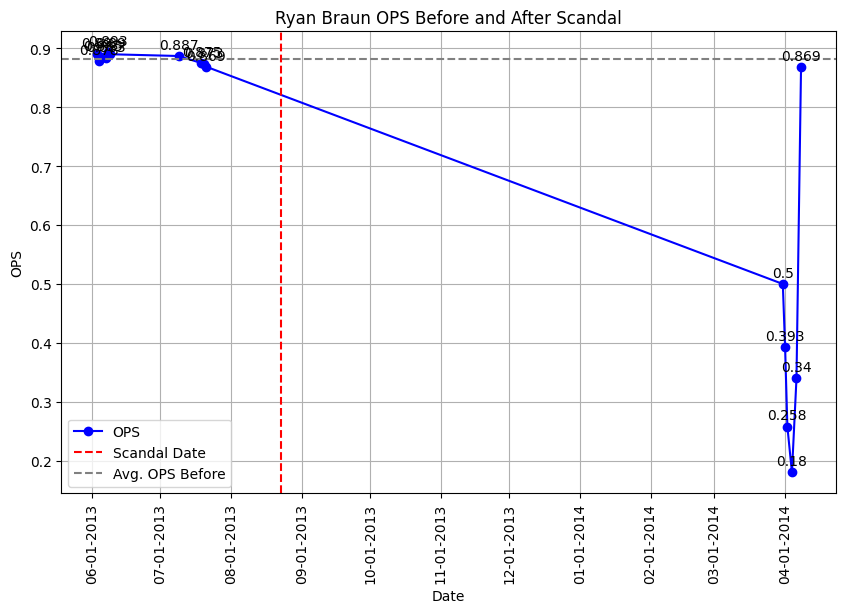

In [53]:
scandal_dates = ['8/23/13']
plot_player_OPS('Ryan Braun', mlb_stats, scandal_dates=scandal_dates)

Looking at Ryan Braun's OPS before and after his scandal, we can clearly it is consistently below his average OPS from before the scandal. Similar to the NFL players, though, there is a significant time gap between the games before and after the scandal.

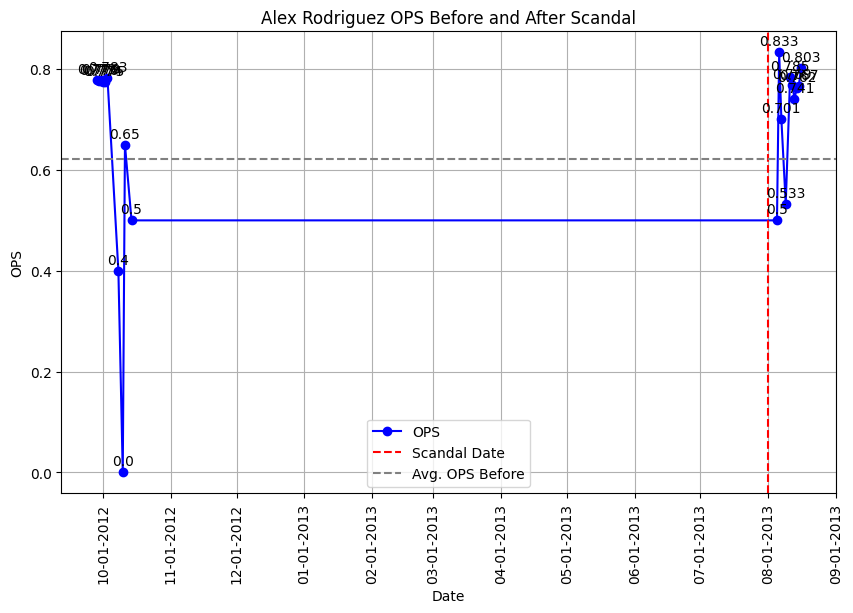

In [54]:
scandal_dates = ['8/1/13']
plot_player_OPS('Alex Rodriguez', mlb_stats, scandal_dates=scandal_dates)

Unlike all of the other players, Alex Rodriguez's OPS after his scandal was, on average, higher than from before the scandal. On the graph, we can clearly see the majority of the points fall above the 'Avg. OPS before' line. 

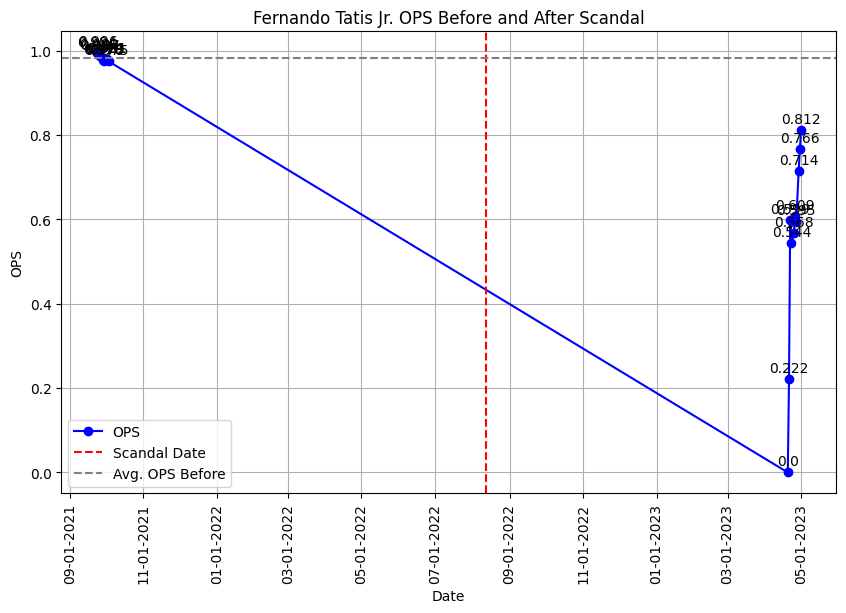

In [55]:
scandal_dates = ['8/12/22']
plot_player_OPS('Fernando Tatis Jr.', mlb_stats, scandal_dates=scandal_dates)

Looking at Fernando Tatis Jr.'s OPS before and after his scandal, we can clearly it is consistently below his average OPS from before the scandal. Similar to the NFL players, though, there is a significant time gap between the games before and after the scandal.

# Ethics & Privacy

Our project acknowledges potential biases and privacy concerns associated with analyzing the impact of scandals on professional athletes' performance. The data collection, which relies on media reports and performance statistics, may inherently reflect biases based on media attention, potentially skewing the analysis towards more high-profile athletes or incidents. This could result in an unbalanced representation of athletes from different backgrounds or sports, raising concerns about the equitable analysis of the dataset. Furthermore, the sensitive nature of the data, which involves personal scandals, poses significant privacy and ethical challenges. It is crucial to ensure that the data handling and analysis processes respect the privacy of the individuals involved, adhering to data protection laws and ethical standards.

To address these issues, we will employ a multifaceted approach. Firstly, we will anonymize the data to protect individuals' identities, ensuring that our analysis does not unjustly expose or target specific athletes. Secondly, we plan to use statistical methods to identify and correct for any biases present in our dataset, such as overrepresentation of certain demographics or types of scandals. This includes conducting a thorough pre-analysis to understand the dataset's composition and applying corrective measures during the analysis phase. Lastly, we commit to transparently communicating the limitations of our study, including potential biases and the steps taken to mitigate them, in our final report. By acknowledging and actively addressing these ethical and privacy concerns, we aim to conduct our research responsibly and contribute valuable insights into the field.

# Discussion and Conclusion


Our research uncovers a complex relationship between negative media attention and the performance of professional athletes, marked by significant variations among individuals. For instance, our analysis of MLB players such as Ryan Braun and Fernando Tatis Jr. indicated a negative distribution in their on-field performance post-scandal. This resulted in as a decrease in their OPS, a critical performance metric, underscoring the impact of media scrutiny. On the other hand, Alex Rodriguez's situation stands out as a unique case where his performance metrics after facing negative media not only recovered but also exceeded his previous achievements. This suggests a complex mix of personal and external factors that can shield an athlete from the negative repercussions of media exposure or even propel them to higher levels of performance.

In the NFL, our sentiment analysis directly tied the rise in negative media sentiment to a decrease in fantasy points for players like Odell Beckham Jr. and Mike Evans, who saw their performance metrics fall below their pre-scandal averages. These observations confirm the tangible effects that off-field controversies can exert on on-field performance. Deshaun Watson’s case further highlighted a long-term trend of performance alteration. These findings underscore the fact that the effects of negative publicity can linger, necessitating a period of adjustment that extends well beyond the immediate aftermath of the scandal, potentially impacting the athlete's career trajectory and mental well-being.

Advancing the ongoing academic discussion, our research not only confirms the detrimental impact of negative media on athletic performance but also goes into how extensively this effect varies among individual athletes, offering a look at their specific journeys through public scrutiny. Taking the conversation from past studies a step further, it measures precisely how much negative media attention affects athletes, providing a clearer view of its consequences and highlighting the variability of athletes' responses to these pressures. With detailed case studies and rigorous data analysis, our investigation produces critical insights for coaches, managers, and the athletes themselves, laying the groundwork for developing strategies to mitigate the impacts of negative media coverage.



# Team Contributions

- **Ava**- EDA, Wrangling, Ideas, Research, Writing, Analysis, Video
- **Gabriel**- EDA, Wrangling, Ideas, Video
- **Sia**- EDA, Wrangling, Ideas, Writing
- **Paul**- EDA, Ideas, Writing
- **Ivan**- EDA, Ideas, Video, Writing